### Part 0: Environment Setup

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import linregress
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.ticker import FuncFormatter

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

### Part 1: Import Data

In [2]:
nys_hotel_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/NYS_Hotel_Data.csv')
nys_hotel_data.head()

,Month,Occ,Rooms Sold,Rooms_Census
0,1/1/13,57.6,"3,533,131","197,868"
1,2/1/13,62.2,"3,451,729","198,193"
2,3/1/13,67.6,"4,180,554","199,492"
3,4/1/13,73.8,"4,488,376","202,727"
4,5/1/13,77.5,"4,988,935","207,656"


In [3]:
nyc_hotel_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/NYC_Hotel_Data.csv')
nyc_hotel_data.head()

,Month,Occ,Rooms Sold,Rooms_Census
0,1/1/13,75.3,"2,425,781","103,919"
1,2/1/13,77.4,"2,249,922","103,817"
2,3/1/13,85.8,"2,775,182","104,338"
3,4/1/13,86.4,"2,718,827","104,893"
4,5/1/13,87.8,"2,876,725","105,692"


In [4]:
leisure_hospitality_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/Leisure&Hospitality.csv')
leisure_hospitality_data.head()

,Unnamed: 0,Date,Number
0,0,2010-01-01,724700
1,1,2010-02-01,726300
2,2,2010-03-01,729300
3,3,2010-04-01,735600
4,4,2010-05-01,733100


In [5]:
new_york_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/New York.csv', header=1)
new_york_data.head()

,Week,new york: (United States)
0,2018-11-11,70
1,2018-11-18,68
2,2018-11-25,68
3,2018-12-02,69
4,2018-12-09,67


In [6]:
stay_in_nyc_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/Stay in NYC.csv', header=1)
stay_in_nyc_data.head()

,Week,stay in nyc: (United States)
0,2018-11-11,38
1,2018-11-18,33
2,2018-11-25,42
3,2018-12-02,43
4,2018-12-09,35


In [7]:
nyc_hotel_search_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/NYC Hotel.csv', header=1)
nyc_hotel_search_data.head()

,Week,NYC Hotels: (United States)
0,2018-11-11,93
1,2018-11-18,78
2,2018-11-25,87
3,2018-12-02,86
4,2018-12-09,83


In [8]:
new_york_travel_data = pd.read_csv('/Users/yuhandai/Documents/APAN5900/data/New york Travel.csv', header=1)
new_york_travel_data.head()

,Week,new york travel: (United States)
0,2018-11-11,23
1,2018-11-18,22
2,2018-11-25,23
3,2018-12-02,23
4,2018-12-09,22


### Part 2: Data Preprocessing

#### 2.1 nys_hotel_data

In [9]:
nys_hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         126 non-null    object 
 1   Occ           126 non-null    float64
 2   Rooms Sold    126 non-null    object 
 3   Rooms_Census  126 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.1+ KB


In [10]:
nys_hotel_data['Month'] = pd.to_datetime(nys_hotel_data['Month'])
nys_hotel_data['Rooms Sold'] = nys_hotel_data['Rooms Sold'].str.replace(',', '').astype(int)
nys_hotel_data['Rooms_Census'] = nys_hotel_data['Rooms_Census'].str.replace(',', '').astype(int)

nys_hotel_data.head()

,Month,Occ,Rooms Sold,Rooms_Census
0,2013-01-01,57.6,3533131,197868
1,2013-02-01,62.2,3451729,198193
2,2013-03-01,67.6,4180554,199492
3,2013-04-01,73.8,4488376,202727
4,2013-05-01,77.5,4988935,207656


#### 2.2 nyc_hotel_data

In [11]:
nyc_hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         126 non-null    object 
 1   Occ           126 non-null    float64
 2   Rooms Sold    126 non-null    object 
 3   Rooms_Census  126 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.1+ KB


In [12]:
nyc_hotel_data['Month'] = pd.to_datetime(nyc_hotel_data['Month'])
nyc_hotel_data['Rooms Sold'] = nyc_hotel_data['Rooms Sold'].str.replace(',', '').astype(int)
nyc_hotel_data['Rooms_Census'] = nyc_hotel_data['Rooms_Census'].str.replace(',', '').astype(int)

nyc_hotel_data.head()

,Month,Occ,Rooms Sold,Rooms_Census
0,2013-01-01,75.3,2425781,103919
1,2013-02-01,77.4,2249922,103817
2,2013-03-01,85.8,2775182,104338
3,2013-04-01,86.4,2718827,104893
4,2013-05-01,87.8,2876725,105692


#### 2.3 leisure_hospitality_data

In [13]:
leisure_hospitality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  164 non-null    int64 
 1   Date        164 non-null    object
 2   Number      164 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [14]:
leisure_hospitality_data['Date'] = pd.to_datetime(leisure_hospitality_data['Date'])

In [15]:
leisure_hospitality_data.head()

,Unnamed: 0,Date,Number
0,0,2010-01-01,724700
1,1,2010-02-01,726300
2,2,2010-03-01,729300
3,3,2010-04-01,735600
4,4,2010-05-01,733100


#### 2.4 google trend data

In [16]:
for df in [new_york_data, stay_in_nyc_data, nyc_hotel_search_data, new_york_travel_data]:
    df.columns = ['Week', 'Search Volume']
    df['Week'] = pd.to_datetime(df['Week']).dt.to_period('M')  # Convert to monthly periods

In [17]:
monthly_new_york_data = new_york_data.groupby('Week')['Search Volume'].sum().reset_index()
monthly_stay_in_nyc_data = stay_in_nyc_data.groupby('Week')['Search Volume'].sum().reset_index()
monthly_nyc_hotel_search_data = nyc_hotel_search_data.groupby('Week')['Search Volume'].sum().reset_index()
monthly_new_york_travel_data = new_york_travel_data.groupby('Week')['Search Volume'].sum().reset_index()

In [18]:
monthly_new_york_data['Week'] = monthly_new_york_data['Week'].dt.to_timestamp()
monthly_stay_in_nyc_data['Week'] = monthly_stay_in_nyc_data['Week'].dt.to_timestamp()
monthly_nyc_hotel_search_data['Week'] = monthly_nyc_hotel_search_data['Week'].dt.to_timestamp()
monthly_new_york_travel_data['Week'] = monthly_new_york_travel_data['Week'].dt.to_timestamp()

In [19]:
monthly_new_york_data.columns = ['Month', 'New York Search']
monthly_stay_in_nyc_data.columns = ['Month', 'Stay in NYC Search']
monthly_nyc_hotel_search_data.columns = ['Month', 'NYC Hotel Search']
monthly_new_york_travel_data.columns = ['Month', 'New York Travel Search']

In [20]:
merged_data = nyc_hotel_data.set_index('Month').join([
    monthly_new_york_data.set_index('Month'),
    monthly_stay_in_nyc_data.set_index('Month'),
    monthly_nyc_hotel_search_data.set_index('Month'),
    monthly_new_york_travel_data.set_index('Month')
], how='inner')

In [21]:
merged_data['Lag1_Search'] = merged_data[['New York Search', 'Stay in NYC Search', 
                                          'NYC Hotel Search', 'New York Travel Search']].sum(axis=1).shift(1)
merged_data['Lag2_Search'] = merged_data[['New York Search', 'Stay in NYC Search', 
                                          'NYC Hotel Search', 'New York Travel Search']].sum(axis=1).shift(2)

merged_data.reset_index().head()

,Month,Occ,Rooms Sold,Rooms_Census,New York Search,Stay in NYC Search,NYC Hotel Search,New York Travel Search,Lag1_Search,Lag2_Search
0,2018-11-01,87.9,3211717,121740,206,113,258,68,NaN,NaN
1,2018-12-01,87.5,3303793,121817,357,202,425,117,645.0,NaN
2,2019-01-01,71.4,2703222,122091,274,157,317,112,1101.0,645.0
3,2019-02-01,76.6,2636067,122964,268,138,316,87,860.0,1101.0
4,2019-03-01,84.0,3199913,122824,348,179,398,112,809.0,860.0


In [22]:
merged_data.dropna(inplace=True)

### Part 3: Visualization

#### 3.1 Lineplot of Trend in Leisure & Hospitality Metric over Time

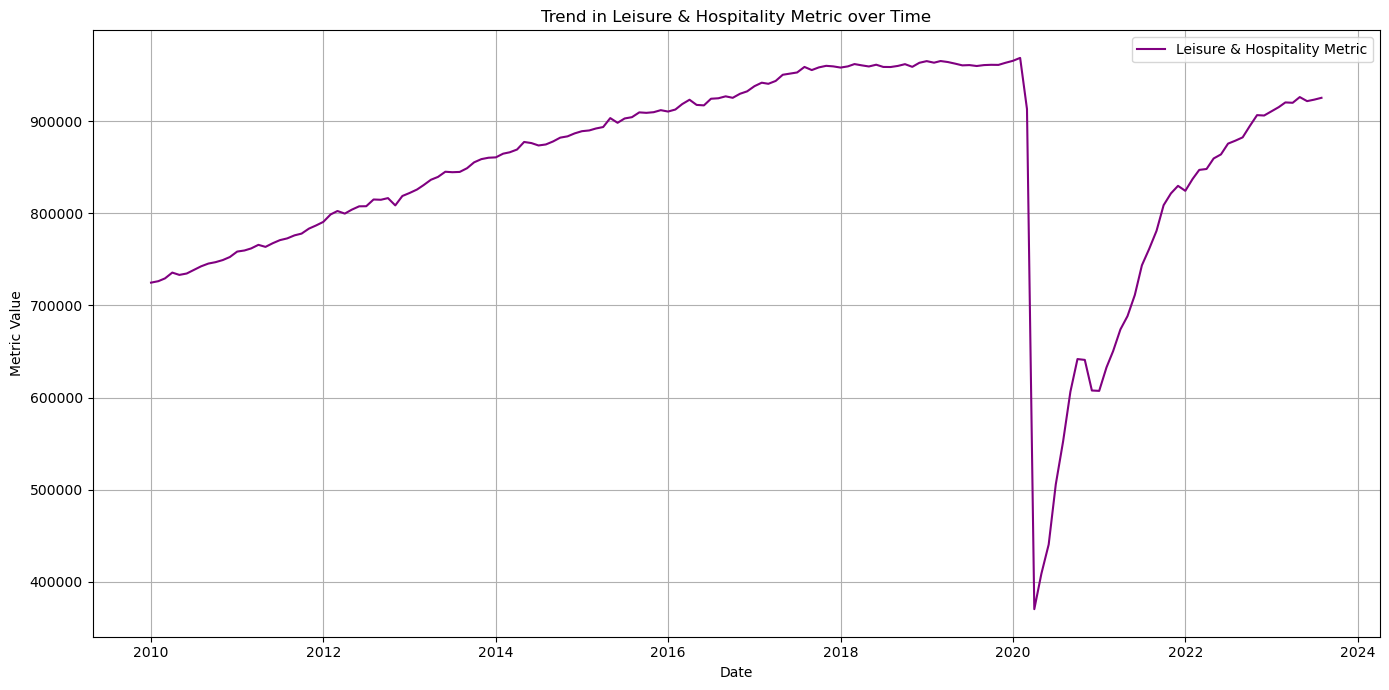

In [23]:
plt.figure(figsize=(14, 7))

plt.plot(leisure_hospitality_data['Date'], leisure_hospitality_data['Number'], label='Leisure & Hospitality Metric', color='purple')

plt.title('Trend in Leisure & Hospitality Metric over Time')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


#### 3.2 Box Plot of Leisure & Hospitality Metric with Outliers Highlighted

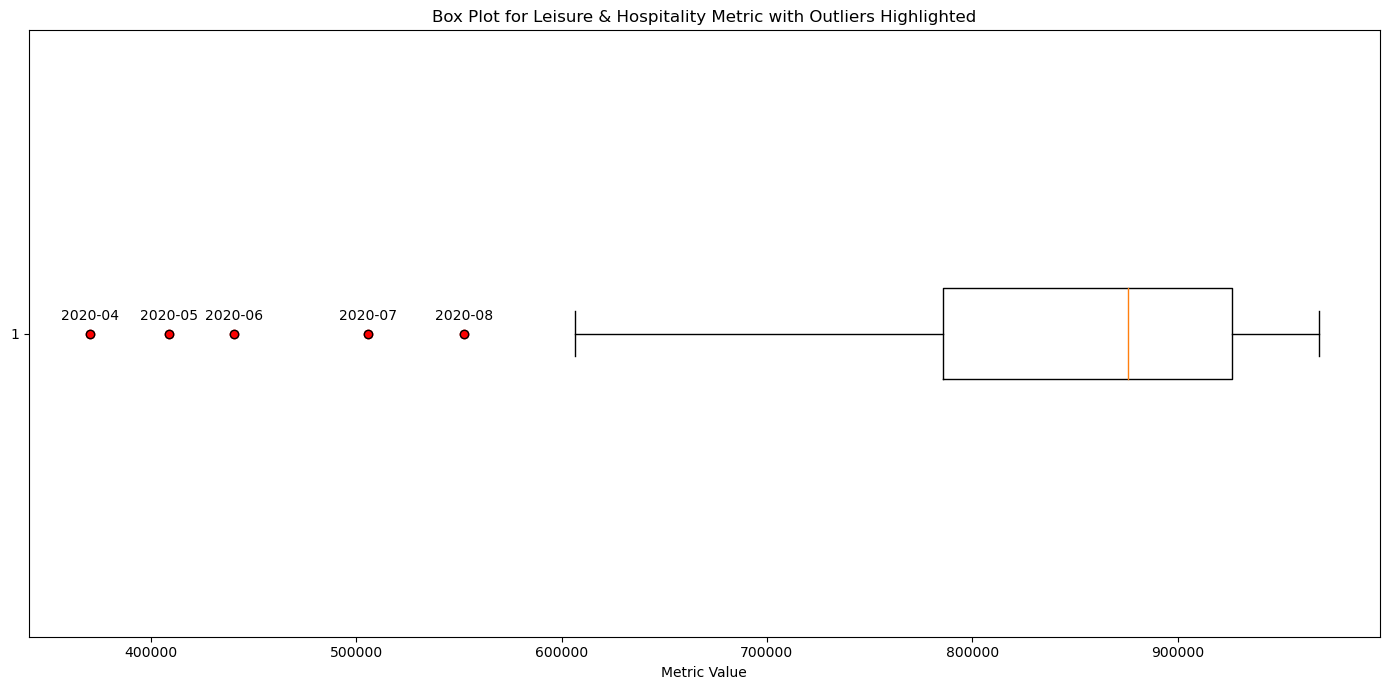

In [24]:
plt.figure(figsize=(14, 7))

plt.boxplot(leisure_hospitality_data['Number'], vert=False)

for index, value in enumerate(leisure_hospitality_data['Number']):
    if value < leisure_hospitality_data['Number'].quantile(0.25) - 1.5 * (leisure_hospitality_data['Number'].quantile(0.75) - leisure_hospitality_data['Number'].quantile(0.25)) or \
       value > leisure_hospitality_data['Number'].quantile(0.75) + 1.5 * (leisure_hospitality_data['Number'].quantile(0.75) - leisure_hospitality_data['Number'].quantile(0.25)):
        plt.scatter(value, 1, color='red')
        plt.annotate(leisure_hospitality_data['Date'].iloc[index].strftime('%Y-%m'), (value, 1), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Box Plot for Leisure & Hospitality Metric with Outliers Highlighted')
plt.xlabel('Metric Value')
plt.tight_layout()

plt.show()

#### 3.3 Lineplot of Hotel Occupancy Rates over Time for NYS and NYC

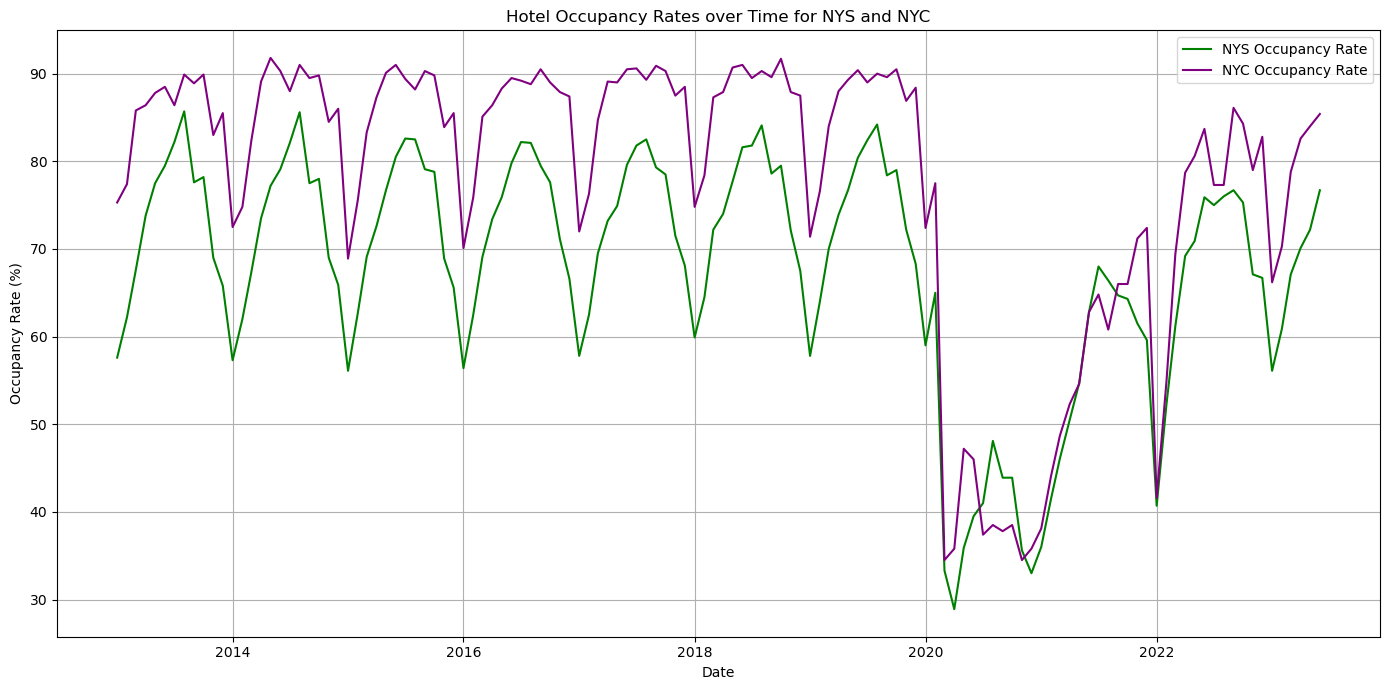

In [25]:
plt.figure(figsize=(14, 7))

plt.plot(nys_hotel_data['Month'], nys_hotel_data['Occ'], label='NYS Occupancy Rate', color='green')
plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Occ'], label='NYC Occupancy Rate', color='purple')

plt.title('Hotel Occupancy Rates over Time for NYS and NYC')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#### 3.4 Lineplot of Rooms Sold over Time for NYS and NYC

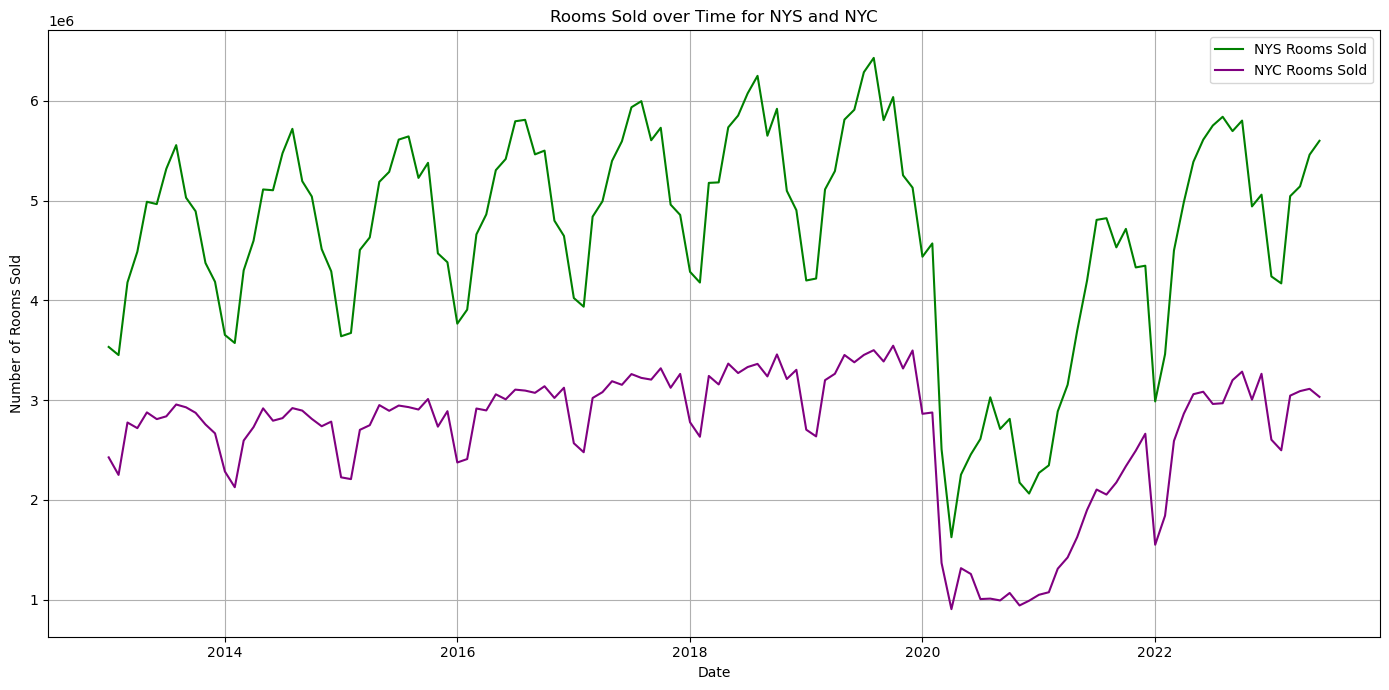

In [26]:
plt.figure(figsize=(14, 7))

plt.plot(nys_hotel_data['Month'], nys_hotel_data['Rooms Sold'], label='NYS Rooms Sold', color='green')
plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms Sold'], label='NYC Rooms Sold', color='purple')

plt.title('Rooms Sold over Time for NYS and NYC')
plt.xlabel('Date')
plt.ylabel('Number of Rooms Sold')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#### 3.5 Lineplot of Rooms Available for Rent over Time for NYS and NYC

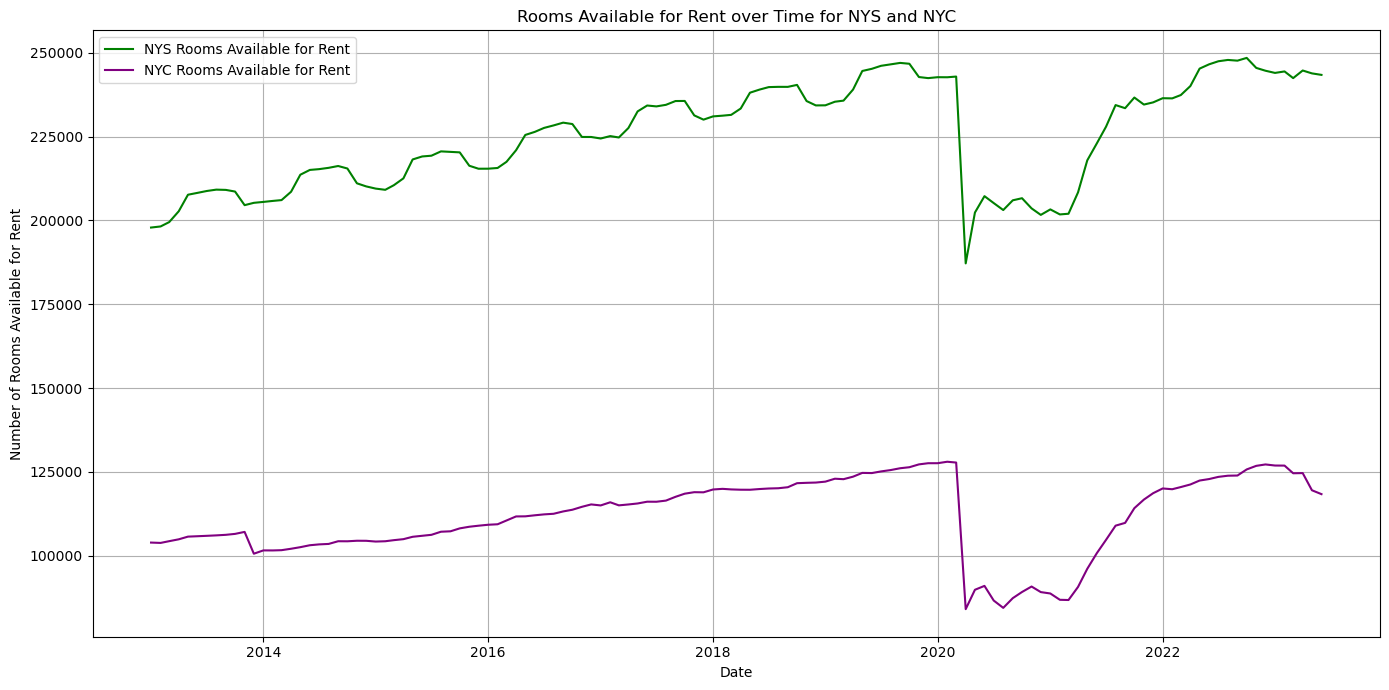

In [27]:
plt.figure(figsize=(14, 7))

plt.plot(nys_hotel_data['Month'], nys_hotel_data['Rooms_Census'], label='NYS Rooms Available for Rent', color='green')
plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms_Census'], label='NYC Rooms Available for Rent', color='purple')

plt.title('Rooms Available for Rent over Time for NYS and NYC')
plt.xlabel('Date')
plt.ylabel('Number of Rooms Available for Rent')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#### 3.6 Scatter Plot with Best-Fit Line of Occupancy Rate vs. Employment in Leisure & Hospitality

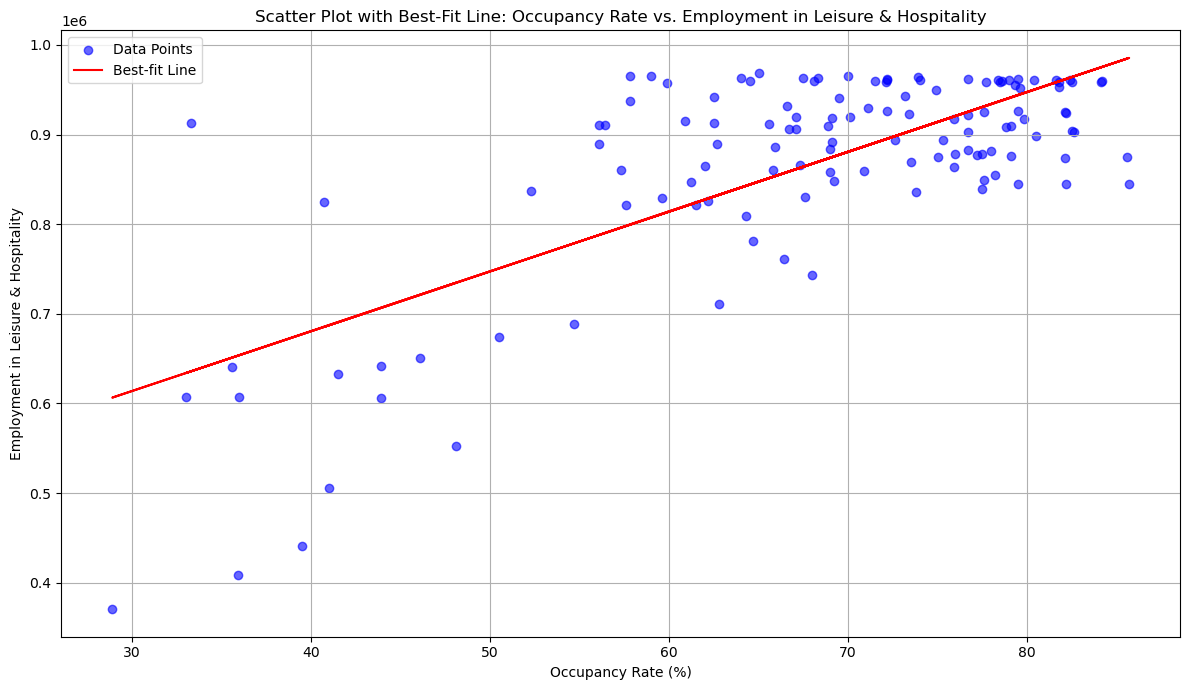

In [28]:
nys_merged_data = pd.merge(nys_hotel_data, leisure_hospitality_data, left_on='Month', right_on='Date', how='inner')

slope, intercept, r_value, p_value, std_err = linregress(nys_merged_data['Occ'], nys_merged_data['Number'])

plt.figure(figsize=(12, 7))
plt.scatter(nys_merged_data['Occ'], nys_merged_data['Number'], color='blue', alpha=0.6, label='Data Points')
plt.plot(nys_merged_data['Occ'], intercept + slope * nys_merged_data['Occ'], color='red', label='Best-fit Line')

plt.title('Scatter Plot with Best-Fit Line: Occupancy Rate vs. Employment in Leisure & Hospitality')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Employment in Leisure & Hospitality')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 3.6 Lineplot of Hotel Occupancy Rate vs. Employment in Leisure & Hospitality (2018-2023)

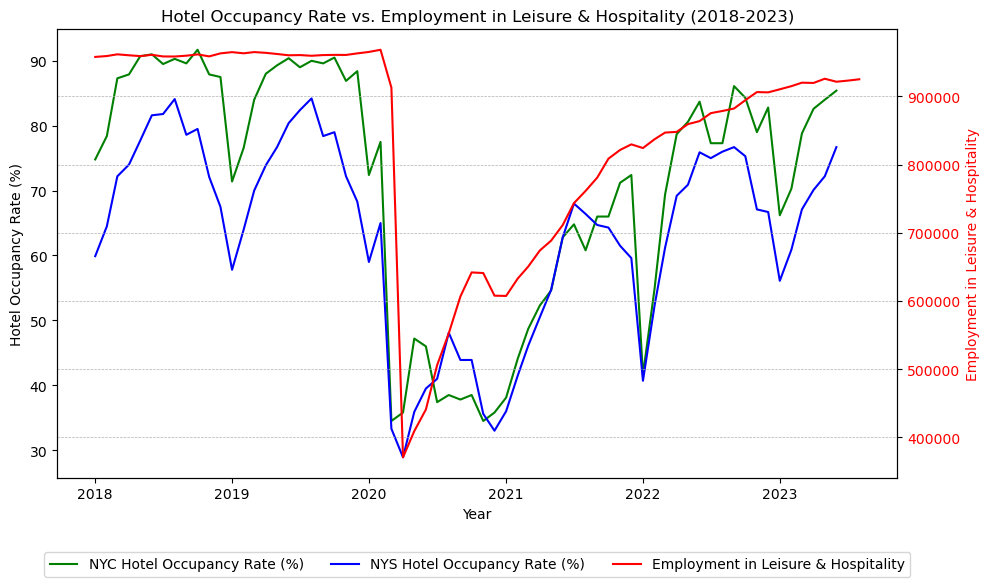

In [29]:
nyc_hotel_data_2018 = nyc_hotel_data[nyc_hotel_data['Month'] >= '2018']
nys_hotel_data_2018 = nys_hotel_data[nys_hotel_data['Month'] >= '2018']
leisure_hospitality_data_2018 = leisure_hospitality_data[leisure_hospitality_data['Date'] >= '2018']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(nyc_hotel_data_2018['Month'], nyc_hotel_data_2018['Occ'], label='NYC Hotel Occupancy Rate (%)', color='green')
ax1.set_ylabel('Hotel Occupancy Rate (%)')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')
ax1.plot(nys_hotel_data_2018['Month'], nys_hotel_data_2018['Occ'], label='NYS Hotel Occupancy Rate (%)', color='blue')

ax3 = ax1.twinx()
ax3.plot(leisure_hospitality_data_2018['Date'], leisure_hospitality_data_2018['Number'], label='Employment in Leisure & Hospitality', color='red')
ax3.set_ylabel('Employment in Leisure & Hospitality', color='red')
ax3.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.title('Hotel Occupancy Rate vs. Employment in Leisure & Hospitality (2018-2023)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Part 4: Short-term NYC Visitation prediction Approach

#### 4.1 extract X and y for regression model

In [30]:
X = merged_data[['Lag1_Search', 'Lag2_Search']]
y = merged_data['Rooms Sold']

#### 4.2 split training and testing datasets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.3 fit and select regression model

In [32]:
# Model 1: Lag 1
model_1 = LinearRegression().fit(X_train[['Lag1_Search']], y_train)

# Model 2: Lag 2
model_2 = LinearRegression().fit(X_train[['Lag2_Search']], y_train)

# Model 3: Lag 1 and Lag 2
model_3 = LinearRegression().fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test[['Lag1_Search']])
y_pred_2 = model_2.predict(X_test[['Lag2_Search']])
y_pred_3 = model_3.predict(X_test)

mae_1 = mean_absolute_error(y_test, y_pred_1)
mae_2 = mean_absolute_error(y_test, y_pred_2)
mae_3 = mean_absolute_error(y_test, y_pred_3)

r2_1 = r2_score(y_test, y_pred_1)
r2_2 = r2_score(y_test, y_pred_2)
r2_3 = r2_score(y_test, y_pred_3)

In [33]:
print(f'Model 1 MAE: {mae_1}, R2: {r2_1}')
print(f'Model 2 MAE: {mae_2}, R2: {r2_2}')
print(f'Model 3 MAE: {mae_3}, R2: {r2_3}')

Model 1 MAE: 589551.4179173247, R2: 0.21547393377841673
Model 2 MAE: 539207.0732019425, R2: 0.14233183685323136
Model 3 MAE: 484898.3779670654, R2: 0.33121057461872894


#### 4.4 fit final regression model

In [34]:
X_merged_data = monthly_new_york_data.set_index('Month').join([
    monthly_stay_in_nyc_data.set_index('Month'),
    monthly_nyc_hotel_search_data.set_index('Month'),
    monthly_new_york_travel_data.set_index('Month')
], how='inner')

X_merged_data['Lag1_Search'] = X_merged_data[['New York Search', 'Stay in NYC Search', 
                                              'NYC Hotel Search', 'New York Travel Search']].sum(axis=1).shift(1)
X_merged_data['Lag2_Search'] = X_merged_data[['New York Search', 'Stay in NYC Search', 
                                              'NYC Hotel Search', 'New York Travel Search']].sum(axis=1).shift(2)
X_merged_data.reset_index().head()

,Month,New York Search,Stay in NYC Search,NYC Hotel Search,New York Travel Search,Lag1_Search,Lag2_Search
0,2018-11-01,206,113,258,68,NaN,NaN
1,2018-12-01,357,202,425,117,645.0,NaN
2,2019-01-01,274,157,317,112,1101.0,645.0
3,2019-02-01,268,138,316,87,860.0,1101.0
4,2019-03-01,348,179,398,112,809.0,860.0


In [35]:
X_pred = X_merged_data[-4:][['Lag1_Search', 'Lag2_Search']]

In [36]:
X_pred

,Lag1_Search,Lag2_Search
Month,,
2023-07-01,981.0,874.0
2023-08-01,1182.0,981.0
2023-09-01,883.0,1182.0
2023-10-01,966.0,883.0


In [37]:
model_google_trend = LinearRegression().fit(X, y)
y_pred = model_google_trend.predict(X_pred)

In [38]:
y_pred

array([2441571.35612547, 3224074.91524666, 3029643.73636577,
       2428900.15135913])

In [39]:
short_term_pred = pd.DataFrame({"Month": X_merged_data.reset_index()[-4:]["Month"], "predicted room sold": y_pred.round().astype(int)})
short_term_pred

,Month,predicted room sold
56,2023-07-01,2441571
57,2023-08-01,3224075
58,2023-09-01,3029644
59,2023-10-01,2428900


### Part 5: Long-term NYC Visitation prediction Approach

#### 5.1 arima model for Leisure & Hospitality Employment Forecast

/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


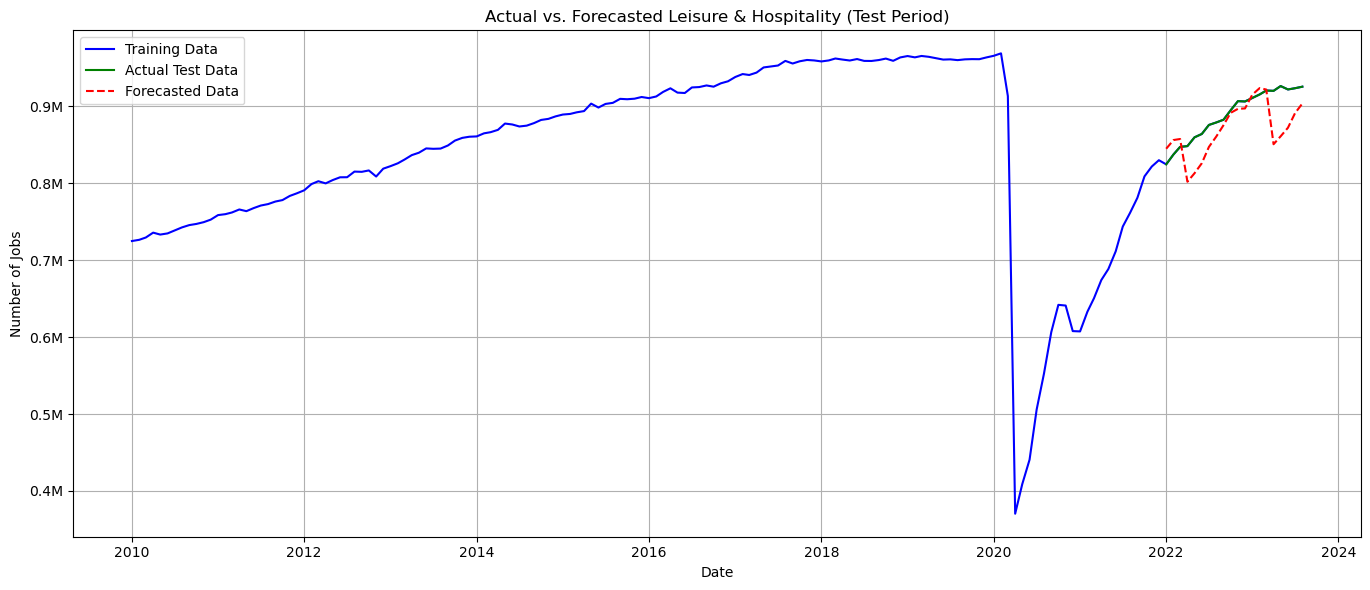

In [40]:
def millions_formatter(x, pos):
    return f'{round(x * 1e-6, 2)}M'

train = leisure_hospitality_data[leisure_hospitality_data['Date'] < '2022-01-01']
test = leisure_hospitality_data[leisure_hospitality_data['Date'] >= '2022-01-01']

model_train = ARIMA(train['Number'], order=(0,1,0), seasonal_order=(1,1,1,12))
result_train = model_train.fit()

forecast_test = result_train.get_forecast(steps=len(test))

mean_forecast_test = forecast_test.predicted_mean

plt.figure(figsize=(14, 6))

plt.plot(leisure_hospitality_data['Date'], leisure_hospitality_data['Number'], label='Training Data', color='blue')
plt.plot(leisure_hospitality_data['Date'][len(train):], test['Number'], label='Actual Test Data', color='green')
plt.plot(leisure_hospitality_data['Date'][len(train):], mean_forecast_test.values, 'r--', label='Forecasted Data')  # dotted line for forecast

plt.title('Actual vs. Forecasted Leisure & Hospitality (Test Period)')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13824D+01    |proj g|=  2.54100D-01

At iterate    5    f=  1.13533D+01    |proj g|=  1.12221D-02

At iterate   10    f=  1.13524D+01    |proj g|=  1.33765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   2.313D-06   1.135D+01
  F =   11.352405793931231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


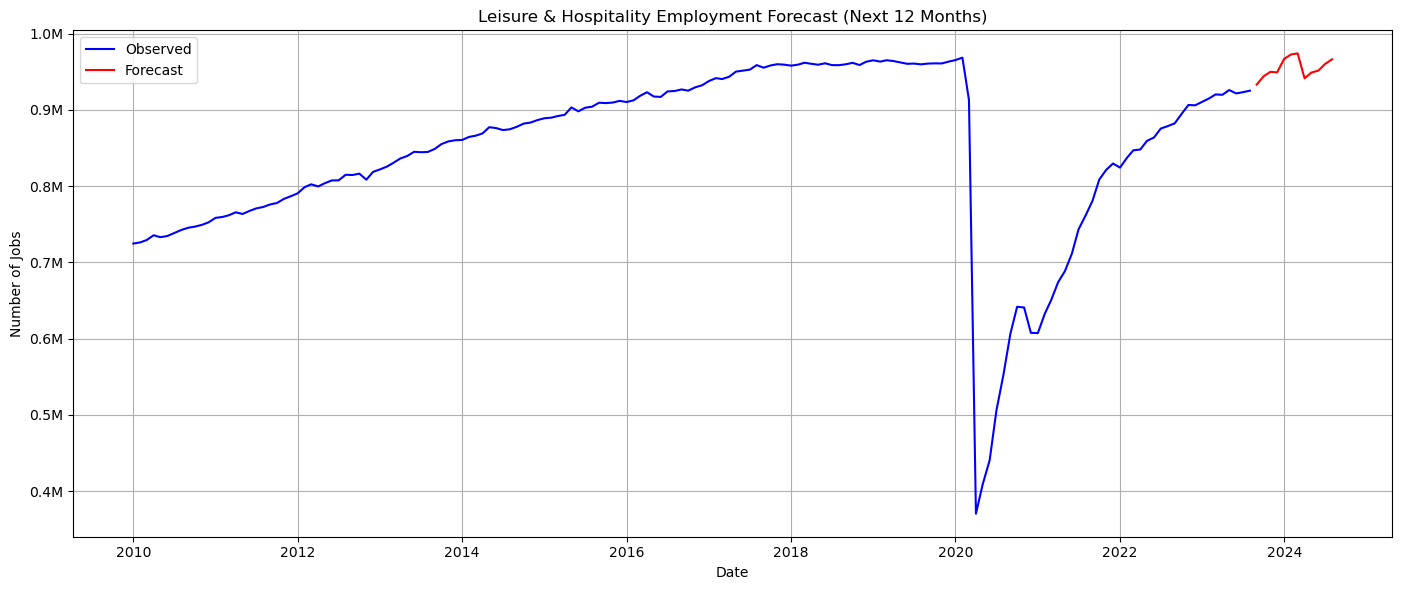

In [41]:
model = sm.tsa.statespace.SARIMAX(leisure_hospitality_data['Number'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
results = model.fit()

forecast = results.forecast(steps=12)

forecasted_dates = pd.date_range(start=leisure_hospitality_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=12, freq='M')

plt.figure(figsize=(14, 6))
plt.plot(leisure_hospitality_data['Date'], leisure_hospitality_data['Number'], label='Observed', color='blue')
plt.plot(forecasted_dates, forecast, color='red', label='Forecast')

plt.title('Leisure & Hospitality Employment Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

#### 5.2 arima model for NYC Hotel Room Sold Forecast

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23664D+01    |proj g|=  4.33944D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      7      1     0     0   6.448D-07   1.233D+01
  F =   12.326161285231350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


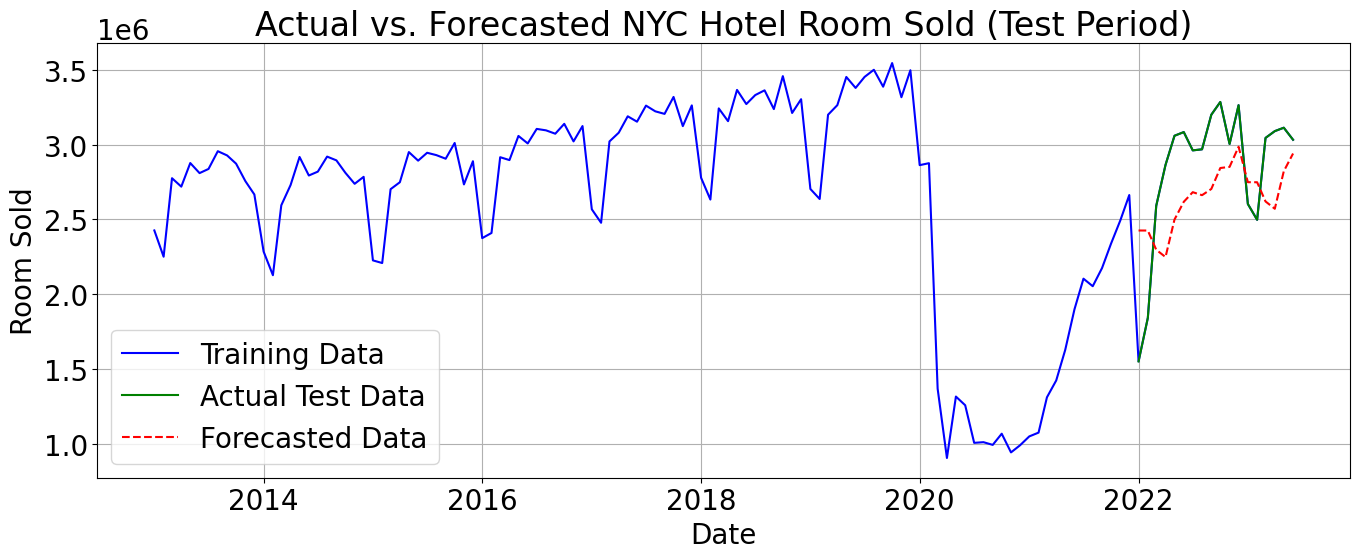

In [42]:
plt.rcParams.update({'font.size': 20})

train = nyc_hotel_data[nyc_hotel_data['Month'] < '2022-01-01']
test = nyc_hotel_data[nyc_hotel_data['Month'] >= '2022-01-01']

model_train = SARIMAX(train['Rooms Sold'], order=(0,1,0), seasonal_order=(0,1,1,12))
result_train = model_train.fit()

forecast_test = result_train.get_forecast(steps=len(test))
mean_forecast_test = forecast_test.predicted_mean

plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms Sold'], label='Training Data', color='blue')
plt.plot(nyc_hotel_data['Month'][len(train):], test['Rooms Sold'], label='Actual Test Data', color='green')
plt.plot(nyc_hotel_data['Month'][len(train):], mean_forecast_test.values, 'r--', label='Forecasted Data')  

plt.title('Actual vs. Forecasted NYC Hotel Room Sold (Test Period)')
plt.xlabel('Date')
plt.ylabel('Room Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25997D+01    |proj g|=  3.46515D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   4.053D-06   1.259D+01
  F =   12.593792222104588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


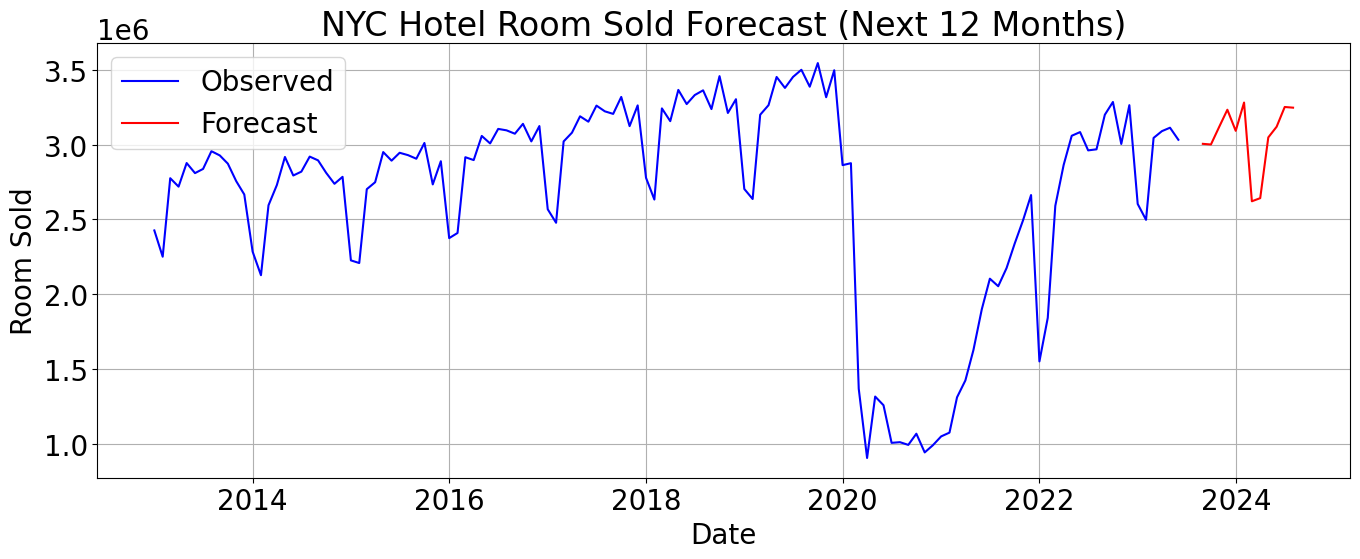

In [43]:
plt.rcParams.update({'font.size': 20})

model_rs = sm.tsa.statespace.SARIMAX(nyc_hotel_data['Rooms Sold'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results_rs = model_rs.fit()

forecast_rs = results_rs.forecast(steps=12)

plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms Sold'], label='Observed', color='blue')

plt.plot(forecasted_dates, forecast_rs, color='red', label='Forecast')

plt.title('NYC Hotel Room Sold Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Room Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25997D+01    |proj g|=  3.46515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   4.053D-06   1.259D+01
  F =   12.593792222104588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


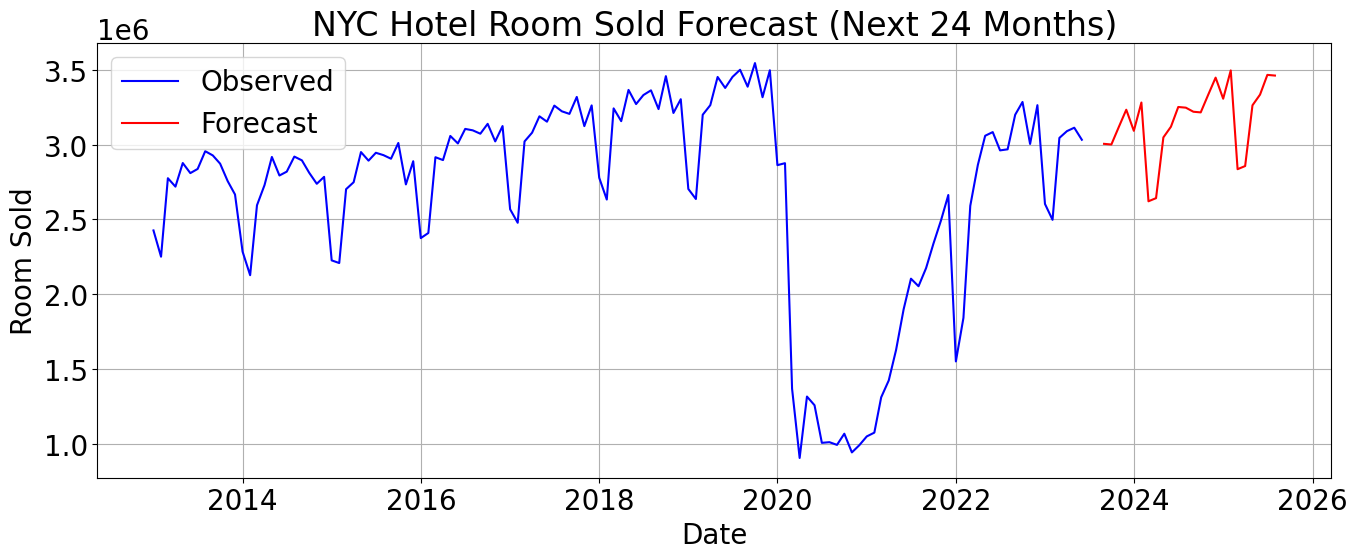

In [44]:
plt.rcParams.update({'font.size': 20})

forecasted_dates_24 = pd.date_range(start=leisure_hospitality_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=24, freq='M')

model_rs = sm.tsa.statespace.SARIMAX(nyc_hotel_data['Rooms Sold'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results_rs = model_rs.fit()

forecast_rs_24 = results_rs.forecast(steps=24)

plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms Sold'], label='Observed', color='blue')

plt.plot(forecasted_dates_24, forecast_rs_24, color='red', label='Forecast')

plt.title('NYC Hotel Room Sold Forecast (Next 24 Months)')
plt.xlabel('Date')
plt.ylabel('Room Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
forecast_rs.mean()

3055233.391425107

#### 5.3 arima model for NYC Occupancy Rate Forecast

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96934D+00    |proj g|=  5.06418D-02

At iterate    5    f=  2.88931D+00    |proj g|=  2.37619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   8.684D-06   2.889D+00
  F =   2.8892586703378531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


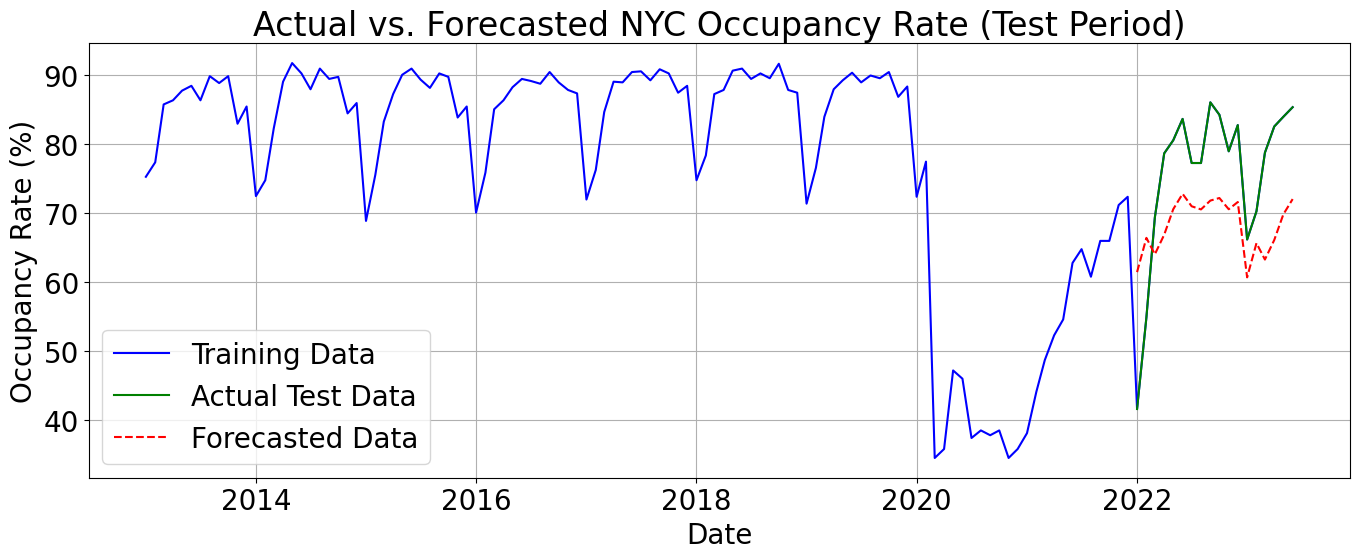

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams.update({'font.size': 20})

# Split the dataset into train and test sets
train = nyc_hotel_data[nyc_hotel_data['Month'] < '2022-01-01']
test = nyc_hotel_data[nyc_hotel_data['Month'] >= '2022-01-01']

# Train the SARIMA model on the training data
model_train = SARIMAX(train['Occ'], order=(0,1,0), seasonal_order=(0,1,1,12))
result_train = model_train.fit()

# Forecast the values for the test period
forecast_test = result_train.get_forecast(steps=len(test))
mean_forecast_test = forecast_test.predicted_mean


plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Occ'], label='Training Data', color='blue')
plt.plot(nyc_hotel_data['Month'][len(train):], test['Occ'], label='Actual Test Data', color='green')
plt.plot(nyc_hotel_data['Month'][len(train):], mean_forecast_test.values, 'r--', label='Forecasted Data')  

plt.title('Actual vs. Forecasted NYC Occupancy Rate (Test Period)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05216D+00    |proj g|=  4.71855D-02

At iterate    5    f=  2.95167D+00    |proj g|=  3.38654D-03

At iterate   10    f=  2.94975D+00    |proj g|=  4.18941D-04

At iterate   15    f=  2.94957D+00    |proj g|=  4.63929D-04

At iterate   20    f=  2.94956D+00    |proj g|=  8.70037D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     25      1     0     0   6.274D-07   2.950D+00
  F =   2.9495544209072362     

CONVERG

 This problem is unconstrained.


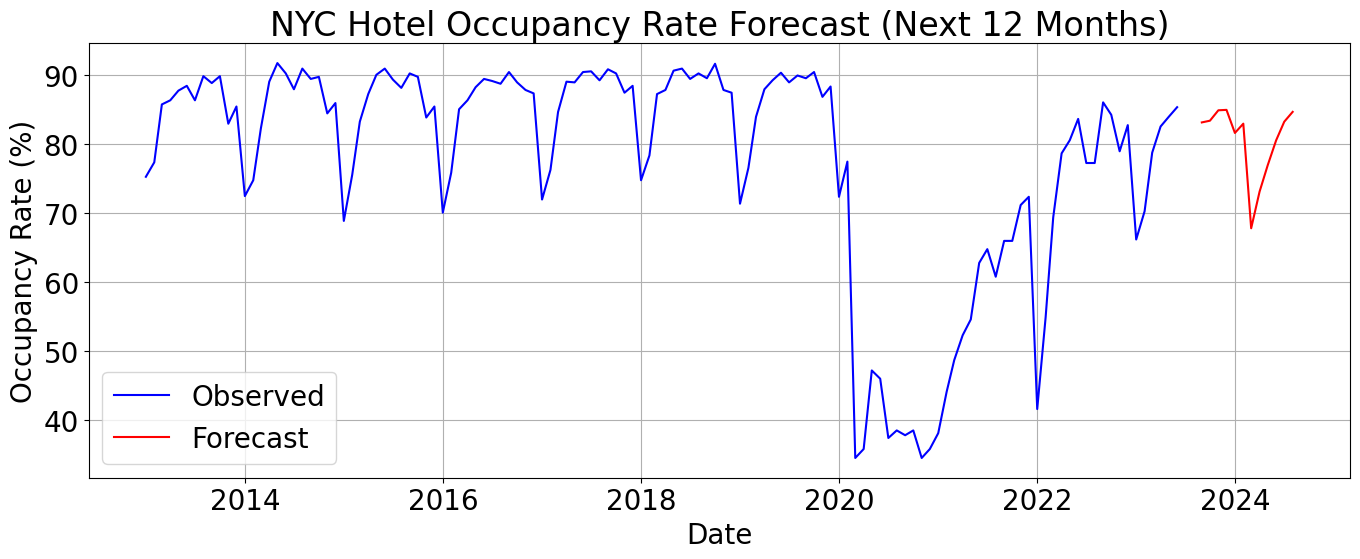

In [47]:
plt.rcParams.update({'font.size': 20})

model_occ = sm.tsa.statespace.SARIMAX(nyc_hotel_data['Occ'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results_occ = model_occ.fit()

forecast_occ = results_occ.forecast(steps=12)

plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Occ'], label='Observed', color='blue')

plt.plot(forecasted_dates, forecast_occ, color='red', label='Forecast')

plt.title('NYC Hotel Occupancy Rate Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.4 arima model for NYC Rooms Available Forecast

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03720D+00    |proj g|=  5.26168D-01

At iterate    5    f=  8.96245D+00    |proj g|=  1.14266D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.143D-05   8.962D+00
  F =   8.9624526322909919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


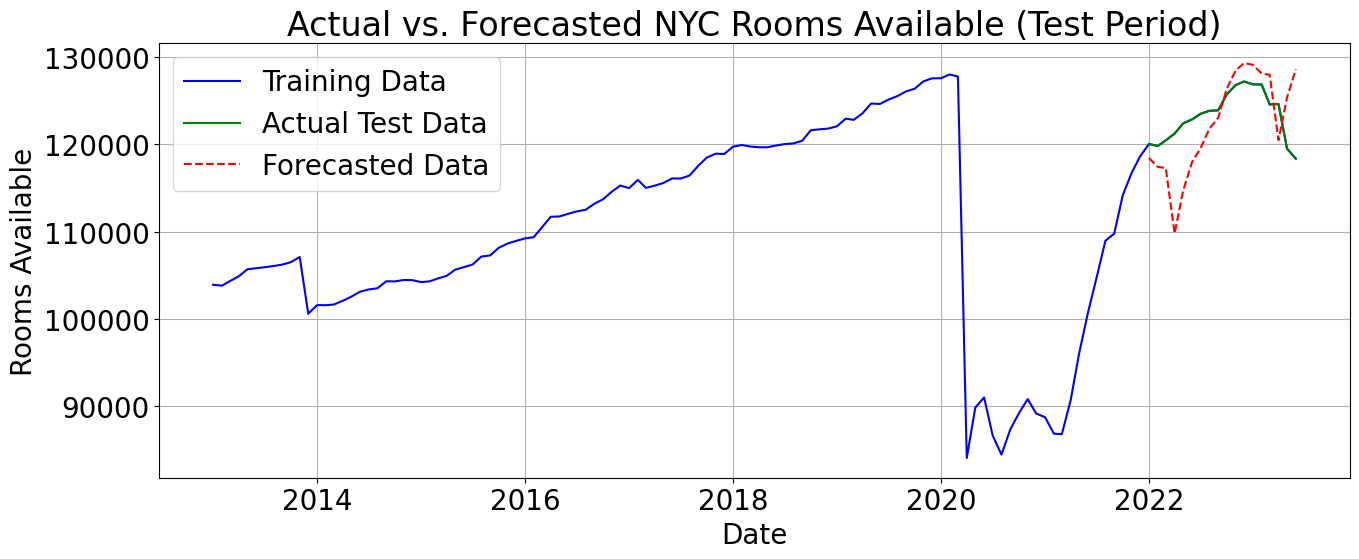

In [48]:
plt.rcParams.update({'font.size': 20})
# Split the dataset into train and test sets
train = nyc_hotel_data[nyc_hotel_data['Month'] < '2022-01-01']
test = nyc_hotel_data[nyc_hotel_data['Month'] >= '2022-01-01']

# Train the SARIMA model on the training data
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_train = SARIMAX(train['Rooms_Census'], order=(0,1,0), seasonal_order=(0,1,1,12))
result_train = model_train.fit()

# Forecast the values for the test period
forecast_test = result_train.get_forecast(steps=len(test))
mean_forecast_test = forecast_test.predicted_mean

# Adjust the plot to ensure continuity between training data and forecast
plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms_Census'], label='Training Data', color='blue')
plt.plot(nyc_hotel_data['Month'][len(train):], test['Rooms_Census'], label='Actual Test Data', color='green')
plt.plot(nyc_hotel_data['Month'][len(train):], mean_forecast_test.values, 'r--', label='Forecasted Data')  

plt.title('Actual vs. Forecasted NYC Rooms Available (Test Period)')
plt.xlabel('Date')
plt.ylabel('Rooms Available')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20364D+00    |proj g|=  4.32106D-02

At iterate    5    f=  9.07766D+00    |proj g|=  3.73408D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     11      1     0     0   3.734D-06   9.078D+00
  F =   9.0776591029893918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


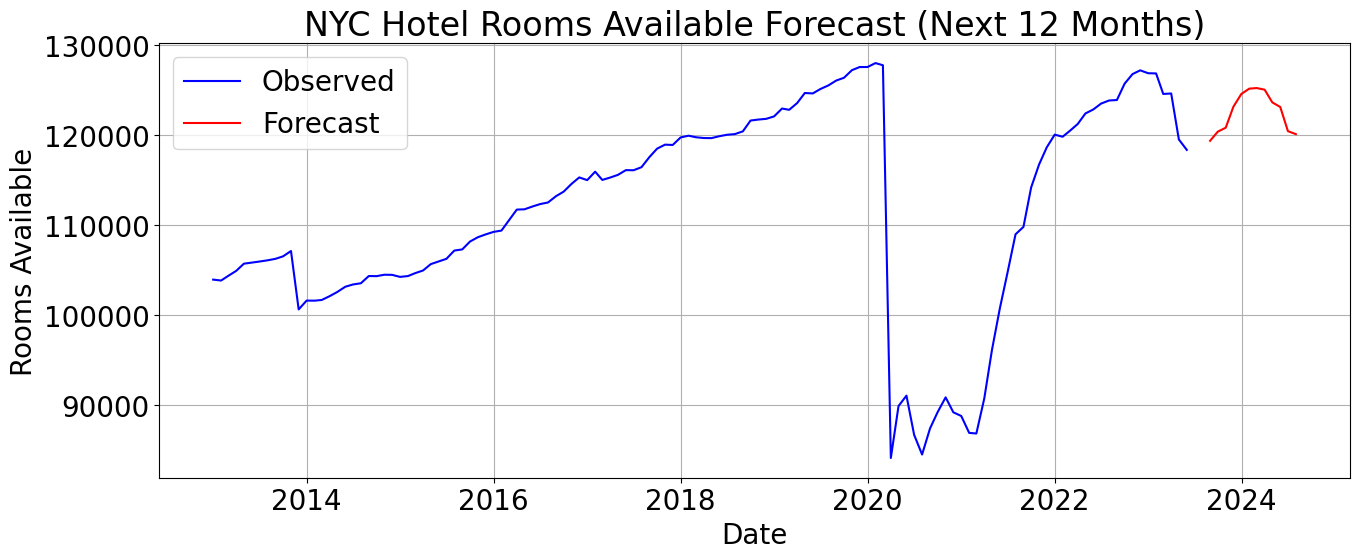

In [49]:
plt.rcParams.update({'font.size': 20})

model_rc = sm.tsa.statespace.SARIMAX(nyc_hotel_data['Rooms_Census'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results_rc = model_rc.fit()

forecast_rc = results_rc.forecast(steps=12)

plt.figure(figsize=(14, 6))

plt.plot(nyc_hotel_data['Month'], nyc_hotel_data['Rooms_Census'], label='Observed', color='blue')

plt.plot(forecasted_dates, forecast_rc, color='red', label='Forecast')

plt.title('NYC Hotel Rooms Available Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Rooms Available')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.5 arima model for NYS Occupancy Rate Forecast

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72976D+00    |proj g|=  7.27949D-02

At iterate    5    f=  2.65139D+00    |proj g|=  1.16047D-03


 This problem is unconstrained.



At iterate   10    f=  2.64974D+00    |proj g|=  1.50671D-02

At iterate   15    f=  2.64640D+00    |proj g|=  3.48335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   2.399D-06   2.646D+00
  F =   2.6462913048947629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


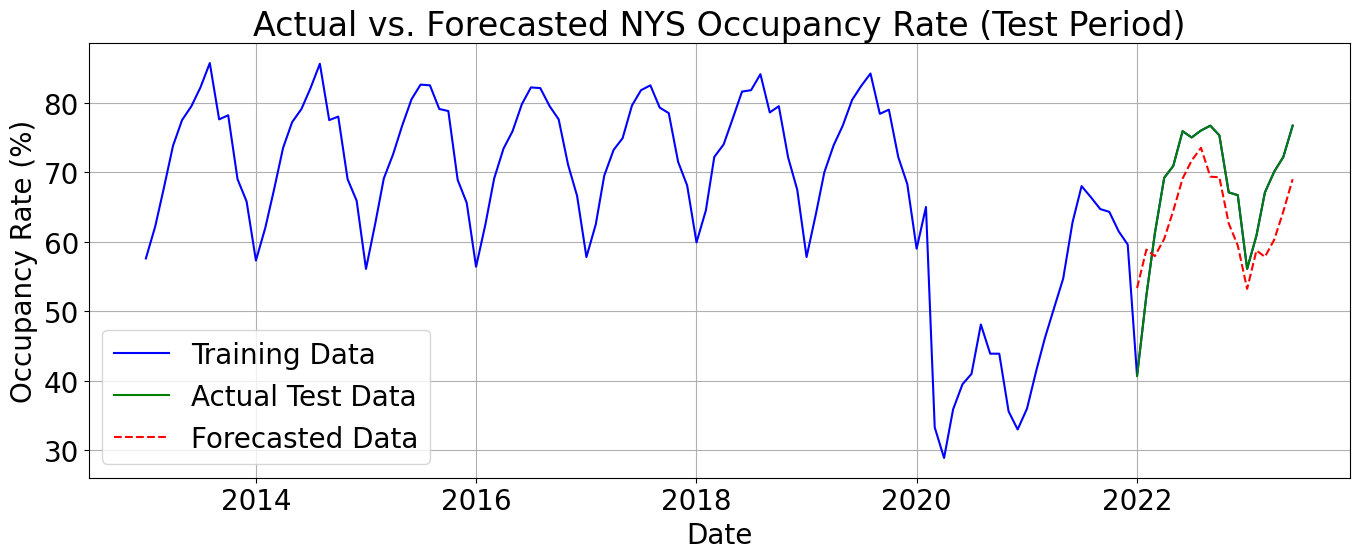

In [50]:
train = nys_hotel_data[nyc_hotel_data['Month'] < '2022-01-01']
test = nys_hotel_data[nyc_hotel_data['Month'] >= '2022-01-01']

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_train = SARIMAX(train['Occ'], order=(1,0,0), seasonal_order=(0,1,1,12))
result_train = model_train.fit()

forecast_test = result_train.get_forecast(steps=len(test))
mean_forecast_test = forecast_test.predicted_mean

plt.figure(figsize=(14, 6))

plt.plot(nys_hotel_data['Month'], nys_hotel_data['Occ'], label='Training Data', color='blue')
plt.plot(nys_hotel_data['Month'][len(train):], test['Occ'], label='Actual Test Data', color='green')
plt.plot(nys_hotel_data['Month'][len(train):], mean_forecast_test.values, 'r--', label='Forecasted Data')  

plt.title('Actual vs. Forecasted NYS Occupancy Rate (Test Period)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78614D+00    |proj g|=  1.32508D-01

At iterate    5    f=  2.67889D+00    |proj g|=  5.16215D-03

At iterate   10    f=  2.67655D+00    |proj g|=  2.46814D-03

At iterate   15    f=  2.67621D+00    |proj g|=  3.12589D-04

At iterate   20    f=  2.67617D+00    |proj g|=  9.67789D-05

At iterate   25    f=  2.67616D+00    |proj g|=  1.08218D-05

At iterate   30    f=  2.67616D+00    |proj g|=  2.96758D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     32      1     0     0   2.968D-06   2.676D+00
  F =   2.6761627467676172    

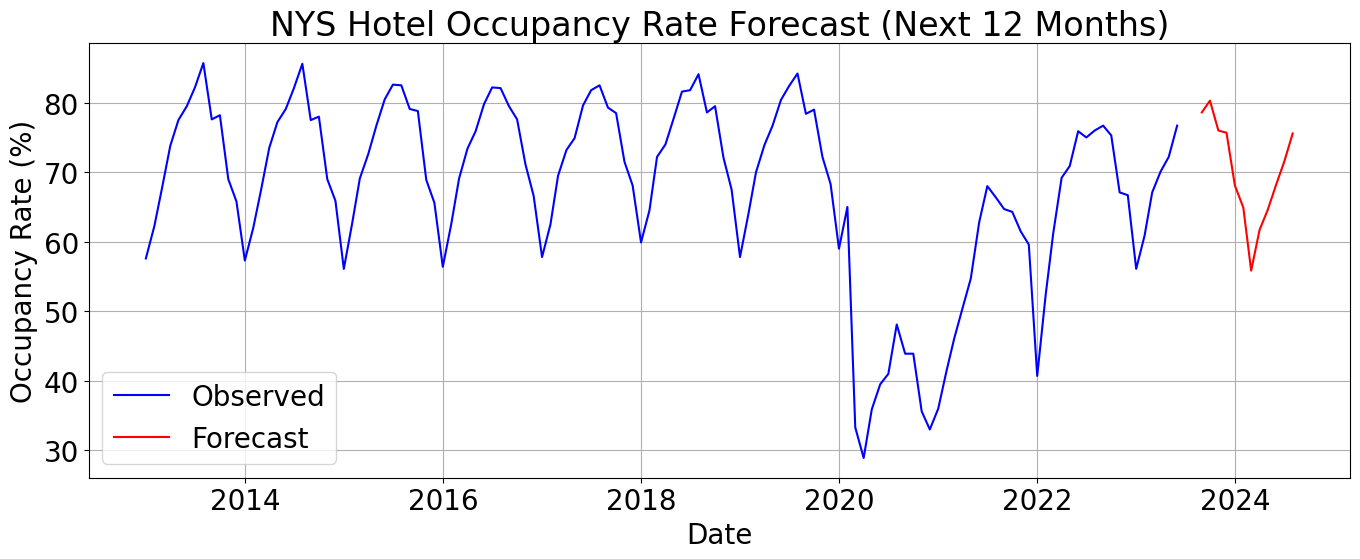

In [51]:
model_occ = sm.tsa.statespace.SARIMAX(nys_hotel_data['Occ'], order=(1, 0, 0), seasonal_order=(0, 1, 1, 12))
results_occ = model_occ.fit()

forecast_occ = results_occ.forecast(steps=12)

plt.figure(figsize=(14, 6))

plt.plot(nys_hotel_data['Month'], nys_hotel_data['Occ'], label='Observed', color='blue')

plt.plot(forecasted_dates, forecast_occ, color='red', label='Forecast')

plt.title('NYS Hotel Occupancy Rate Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.5 Prophet model for NYS Occupancy Rate Forecast

In [52]:
df_occ = nys_hotel_data[['Month', 'Occ']].rename(columns={'Month': 'ds', 'Occ': 'y'})

train = df_occ.iloc[:-12].copy()
test = df_occ.iloc[-12:].copy()

prophet_train_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_train_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_train_model.fit(train)

future_dates_train = prophet_train_model.make_future_dataframe(periods=12, freq='M')
forecast_train = prophet_train_model.predict(future_dates_train)

forecasted_values = forecast_train['yhat'][-12:].values

mae = mean_absolute_error(test['y'], forecasted_values)

forecasted_values, mae

/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.15991
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       226.658   0.000243156       83.1487      0.5616      0.5616      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       227.163   0.000169487       86.6492      0.3914      0.3914      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       227.169    3.7048e-06        91.441   4.441e-08       0.001      341  LS failed, Hessian reset 
     299        227.17   0.000104961       79.3121          10           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       227.183   3.72071e-07       80.9749       0.275       0.275      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       227.185   9.23239e-09    

(array([86.34207495, 96.54847392, 90.42075695, 95.22278417, 87.26485176,
        85.12121132, 71.29211962, 68.05586768, 30.83515653, 66.99049867,
        35.53093196, 68.35722724]),
 17.571193831692245)

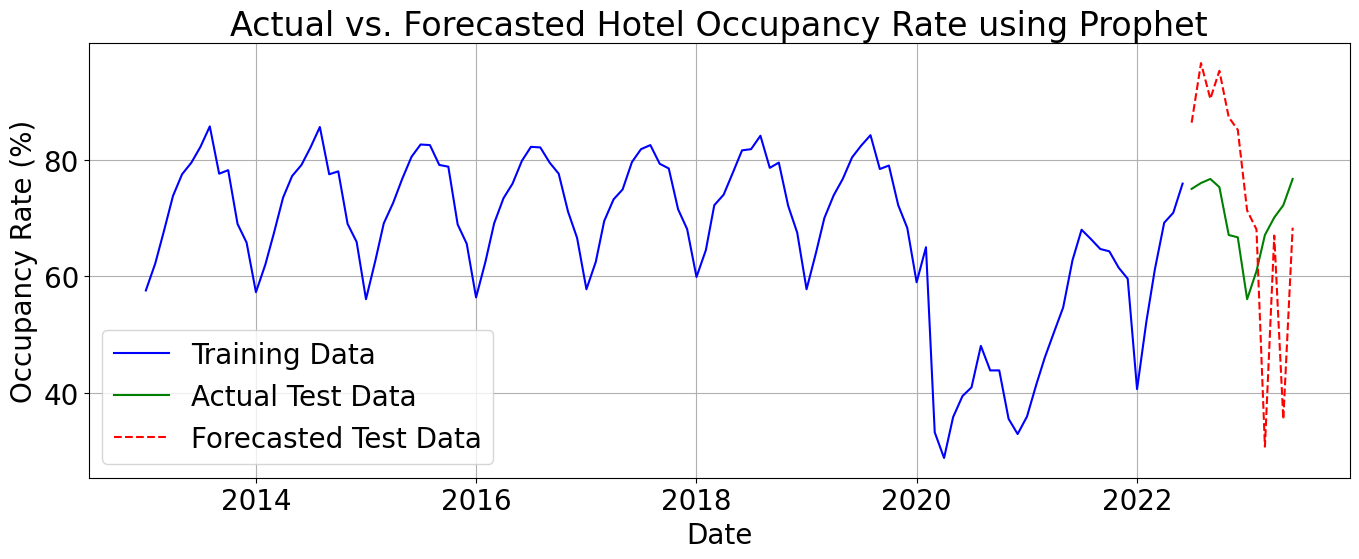

In [53]:
plt.figure(figsize=(14, 6))

plt.plot(train['ds'], train['y'], label='Training Data', color='blue')

plt.plot(test['ds'], test['y'], label='Actual Test Data', color='green')

plt.plot(test['ds'], forecasted_values, label='Forecasted Test Data', color='red', linestyle='--')

plt.title('Actual vs. Forecasted Hotel Occupancy Rate using Prophet')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yuhandai/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.17948
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        250.89    0.00652917       96.2269      0.8071      0.8071      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       252.461   7.62773e-07       75.7546      0.8339      0.8339      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       252.461   6.52195e-09       92.3021      0.2495      0.2495      273   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


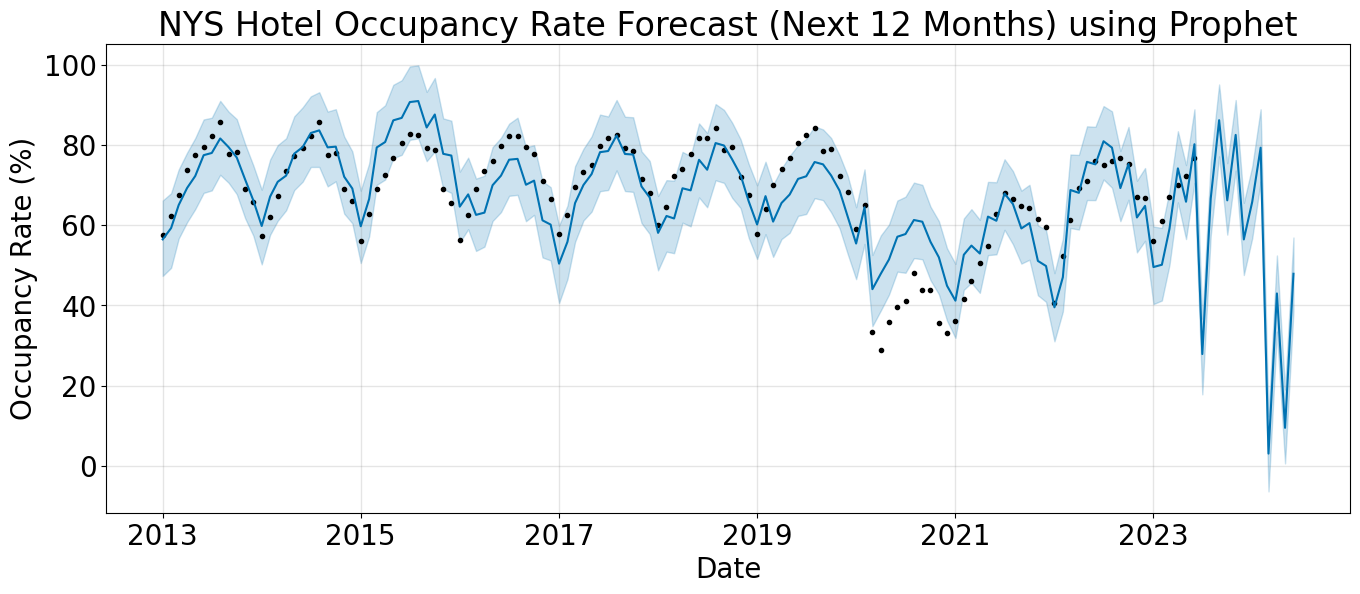

In [54]:
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(df_occ)

future_dates = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast_occ_prophet = prophet_model.predict(future_dates)

fig_occ = prophet_model.plot(forecast_occ_prophet, figsize=(14, 6))
plt.title('NYS Hotel Occupancy Rate Forecast (Next 12 Months) using Prophet')
plt.ylabel('Occupancy Rate (%)')
plt.xlabel('Date')
plt.show()

### Part 6: ILNY Future Visitation Projection

In [55]:
def ILNY_projection (nyc_room_sold):
    
    nyc_STR_hotel_room_nights = nyc_room_sold

    nyc_average_person_per_room_STR = 2
    nyc_STR_hotel_person_room_nights = nyc_STR_hotel_room_nights * nyc_average_person_per_room_STR

    nyc_average_length_of_stay_STR = 2
    nyc_ON_visitors_STR_hotels = nyc_STR_hotel_person_room_nights/nyc_average_length_of_stay_STR
    nyc_ON_visitors_STR_hotels_total = sum(nyc_ON_visitors_STR_hotels)
    
    nyc_O_N_non_STR_hotels = 65
    nyc_average_rooms_non_STR_hotel = 50
    nyc_ocupancy_rate_non_STR_hotels = 0.65
    nyc_ON_visitors_non_STR_hotels_total = nyc_O_N_non_STR_hotels*nyc_average_rooms_non_STR_hotel*nyc_ocupancy_rate_non_STR_hotels
    
    nyc_VFF_overnight_unpaid = nyc_ON_visitors_STR_hotels * 0.2
    nyc_VFF_overnight_unpaid_total = sum(nyc_VFF_overnight_unpaid)

    nyc_other_lodging_options = nyc_ON_visitors_STR_hotels * 0.02
    nyc_other_lodging_options_total = sum(nyc_other_lodging_options)
    
    nyc_sharing_overnight = nyc_ON_visitors_STR_hotels * 0.15
    nyc_sharing_overnight_total = sum(nyc_sharing_overnight)
    
    nyc_total_overnight = nyc_ON_visitors_STR_hotels+nyc_ON_visitors_non_STR_hotels_total+nyc_VFF_overnight_unpaid+nyc_other_lodging_options+nyc_sharing_overnight
    nyc_total_overnight_total = sum(nyc_total_overnight)
    
    nyc_total_visitation = nyc_total_overnight / 0.55
    [print(i) for i in nyc_total_visitation]

    nyc_total_visitation_total = sum(nyc_total_visitation)
    print("total:",nyc_total_visitation_total)
    
    return(nyc_total_visitation)

In [56]:
nyc_rooms_available_12 = forecast_rc
nyc_occupancy_rate_12 = forecast_occ
ncy_room_sold = nyc_occupancy_rate_12 * 0.01 * nyc_rooms_available_12 * 30

In [57]:
ILNY_projection(ncy_room_sold)

7016179.324560772
7227891.507358651
6866160.485347245
6969621.031746135
6342542.281582791
6076337.247161978
5230708.761947579
5771164.794132606
5971073.70472217
6279875.923470893
6441570.6840407215
6786934.721223916
total: 76980060.46729545


126    7.016179e+06
127    7.227892e+06
128    6.866160e+06
129    6.969621e+06
130    6.342542e+06
131    6.076337e+06
132    5.230709e+06
133    5.771165e+06
134    5.971074e+06
135    6.279876e+06
136    6.441571e+06
137    6.786935e+06
Name: predicted_mean, dtype: float64

In [58]:
ncy_room_sold_rs = forecast_rs

In [59]:
ILNY_projection(ncy_room_sold_rs)

7489354.578659162
7478569.036503735
7775663.172557919
8057975.374333418
7706472.613207069
8177929.995195618
6532136.782710304
6584411.503346397
7596502.896811685
7774760.076906166
8103694.141109477
8092324.292347683
total: 91369794.46368864


126    7.489355e+06
127    7.478569e+06
128    7.775663e+06
129    8.057975e+06
130    7.706473e+06
131    8.177930e+06
132    6.532137e+06
133    6.584412e+06
134    7.596503e+06
135    7.774760e+06
136    8.103694e+06
137    8.092324e+06
Name: predicted_mean, dtype: float64

In [62]:
ncy_room_sold_rs_24 = forecast_rs_24

In [63]:
ILNY_projection(ncy_room_sold_rs_24)

7489354.578659162
7478569.036503735
7775663.172557919
8057975.374333418
7706472.613207069
8177929.995195618
6532136.782710304
6584411.503346397
7596502.896811685
7774760.076906166
8103694.141109477
8092324.292347683
8024382.816461392
8013597.274305964
8310691.410360147
8593003.612135647
8241500.851009298
8712958.232997846
7067165.020512532
7119439.741148625
8131531.134613911
8309788.314708394
8638722.378911704
8627352.530149912
total: 189159927.78100395


126    7.489355e+06
127    7.478569e+06
128    7.775663e+06
129    8.057975e+06
130    7.706473e+06
131    8.177930e+06
132    6.532137e+06
133    6.584412e+06
134    7.596503e+06
135    7.774760e+06
136    8.103694e+06
137    8.092324e+06
138    8.024383e+06
139    8.013597e+06
140    8.310691e+06
141    8.593004e+06
142    8.241501e+06
143    8.712958e+06
144    7.067165e+06
145    7.119440e+06
146    8.131531e+06
147    8.309788e+06
148    8.638722e+06
149    8.627353e+06
Name: predicted_mean, dtype: float64

In [64]:
ncy_room_sold_6_10 = y_pred

In [65]:
ILNY_projection(ncy_room_sold_6_10)

6085573.196167079
8034718.425250783
7550408.03422019
6054010.377021822
total: 27724710.032659873


array([6085573.19616708, 8034718.42525078, 7550408.03422019,
       6054010.37702182])

6085573.196167079
8034718.425250783
7550408.03422019
6054010.377021822
total: 27724710.032659873


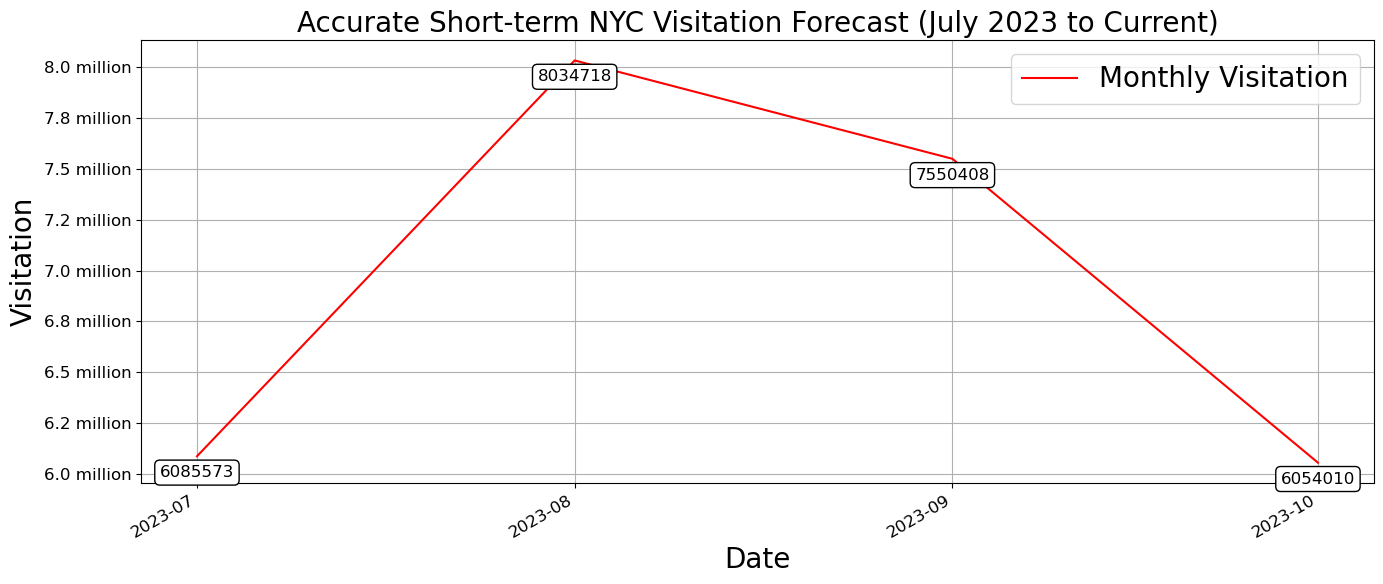

In [66]:
nyc_total_visitation = ILNY_projection(ncy_room_sold_6_10)

plt.rcParams.update({'font.size': 12})

def million_formatter(x, pos):
    return f'{x / 1_000_000:.1f} million'

plt.figure(figsize=(14, 6))

forecasted_dates = X_merged_data.reset_index().Month[-4:]

plt.plot(forecasted_dates, nyc_total_visitation, color='red')

plt.title('Accurate Short-term NYC Visitation Forecast (July 2023 to Current)', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Visitation', fontsize=20)
legend = plt.legend(labels=['Monthly Visitation'], fontsize=20)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))

for date, value in zip(forecasted_dates, nyc_total_visitation):
    plt.annotate(f'{round(value)}', (mdates.date2num(date), value), textcoords="offset points", xytext=(0,-15), ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


7489354.578659162
7478569.036503735
7775663.172557919
8057975.374333418
7706472.613207069
8177929.995195618
6532136.782710304
6584411.503346397
7596502.896811685
7774760.076906166
8103694.141109477
8092324.292347683
8024382.816461392
8013597.274305964
8310691.410360147
8593003.612135647
8241500.851009298
8712958.232997846
7067165.020512532
7119439.741148625
8131531.134613911
8309788.314708394
8638722.378911704
8627352.530149912
total: 189159927.78100395


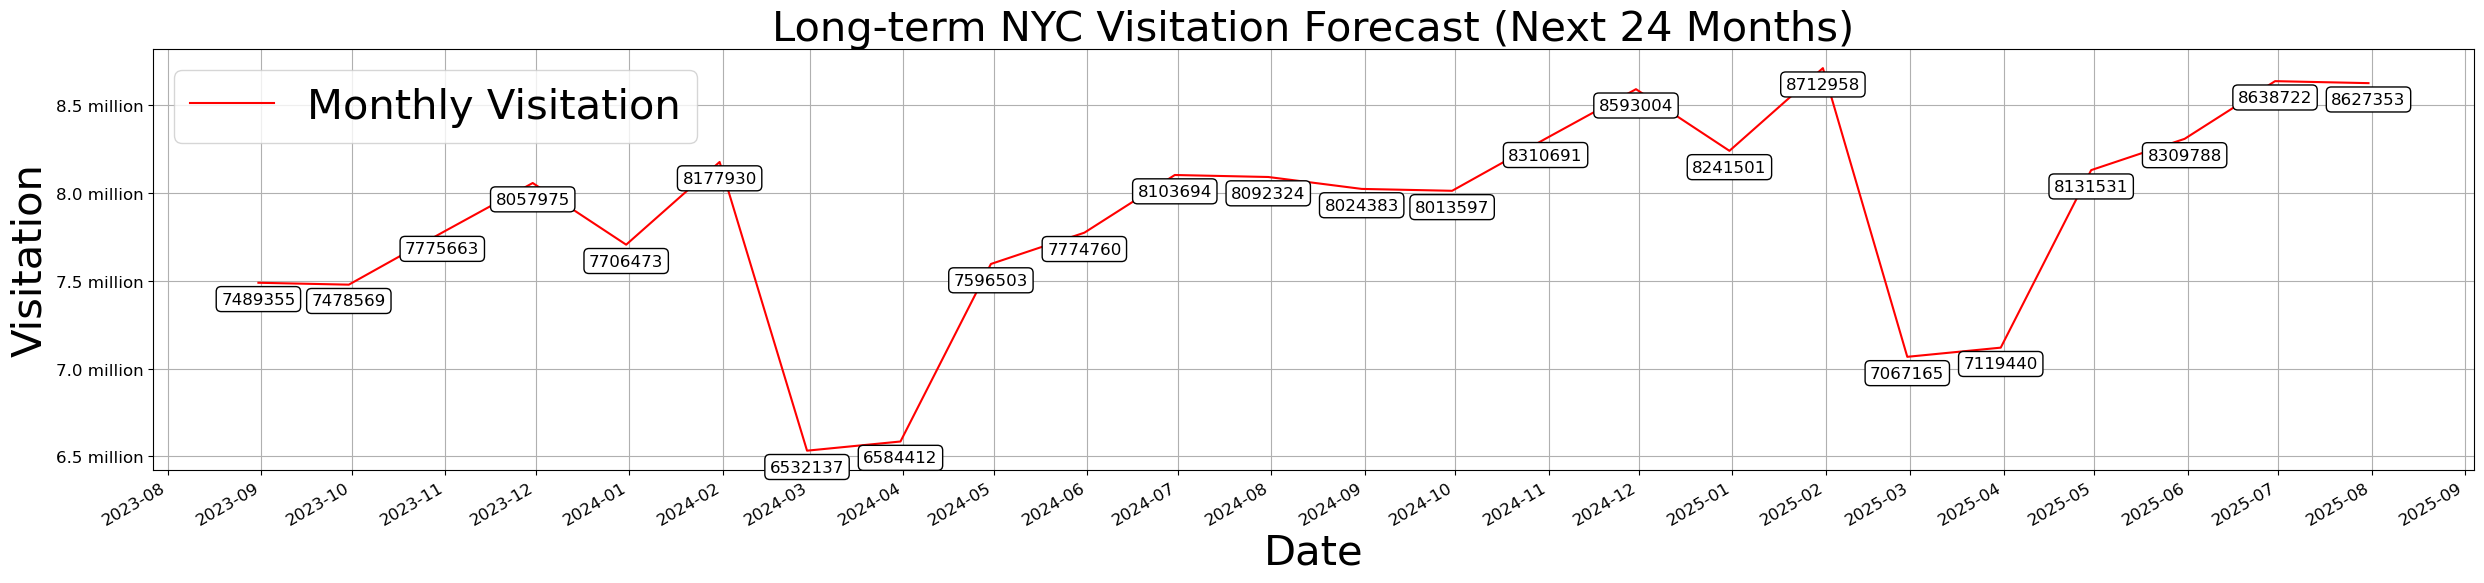

In [68]:
nyc_total_visitation = ILNY_projection(ncy_room_sold_rs_24)

plt.rcParams.update({'font.size': 12})

def million_formatter(x, pos):
    return f'{x / 1_000_000:.1f} million'

plt.figure(figsize=(25, 6))

plt.plot(forecasted_dates_24, nyc_total_visitation, color='red')

plt.title('Long-term NYC Visitation Forecast (Next 24 Months)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Visitation', fontsize=30)
legend = plt.legend(labels=['Monthly Visitation'], fontsize=30)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))

for date, value in zip(forecasted_dates_24, nyc_total_visitation):
    plt.annotate(f'{round(value)}', (mdates.date2num(date), value), textcoords="offset points", xytext=(0,-15), ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()
